In [1]:
import os
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from ts_channel import TSChannel
from hamming_channel_47 import HammingChannel47

In [2]:
info_bit_error_probas_hamming = []
ps = [0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 5e-4, 2e-4, 1e-4, 5e-5, 2e-5, 1e-5]
bit_values = [0, 1]
save_folder = "./bit_error_results"
method = "hamming"

for p in ps:
    save_path_original = save_folder + f"/{p}-{method}-bits-original.npy"
    with open(save_path_original, "rb") as f:
        original_bits_groups = np.load(f)

    save_path_decoded = save_folder + f"/{p}-{method}-bits-decoded.npy"
    with open(save_path_decoded, "rb") as f:
        decoded_bits_groups = np.load(f)
        
    original = original_bits_groups.reshape(-1)
    decoded = decoded_bits_groups.reshape(-1)
    info_bit_error_proba = np.not_equal(original, decoded).sum()/len(original)
    info_bit_error_probas_hamming.append(info_bit_error_proba)

In [3]:
info_bit_error_probas_ts = []
method = "ts"

for p in ps:
    save_path_original = save_folder + f"/{p}-{method}-bits-original.npy"
    with open(save_path_original, "rb") as f:
        original_bits_groups = np.load(f)

    save_path_decoded = save_folder + f"/{p}-{method}-bits-decoded.npy"
    with open(save_path_decoded, "rb") as f:
        decoded_bits_groups = np.load(f)
        
    original = original_bits_groups.reshape(-1)
    decoded = decoded_bits_groups.reshape(-1)
    info_bit_error_proba = np.not_equal(original, decoded).sum()/len(original)
    info_bit_error_probas_ts.append(info_bit_error_proba)

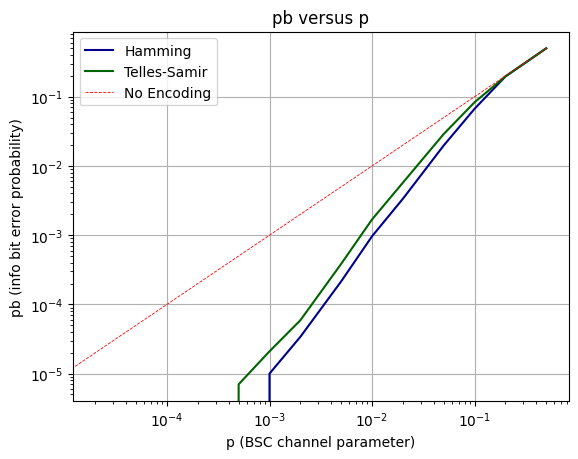

In [4]:
fig, ax = plt.subplots(1, 1)
ax.loglog(ps, info_bit_error_probas_hamming, color="darkblue")
ax.loglog(ps, info_bit_error_probas_ts, color="darkgreen")
ax.grid()
ax.set_title("pb versus p")
ax.set_xlabel("p (BSC channel parameter)")
ax.set_ylabel("pb (info bit error probability)")

n = [0.5, 0.4, 0.3, 0.2, 0.1, 0]
ax.loglog(n, n, color = "red", linestyle="--", linewidth=0.6)

ax.legend(["Hamming", "Telles-Samir", "No Encoding"])